# Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

### Reading in the train.csv file and test.csv file.

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

### Joining train and test data & Dropping SalePrice column. 

In [4]:
n_train = train.shape[0]
n_test = test.shape[0]
y = train['SalePrice'].values
data = pd.concat((train, test)).reset_index(drop = True)
data.drop(['SalePrice'], axis=1, inplace = True)

C:\Users\Vaibhav\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


# Data Visualisation / Data Analysis

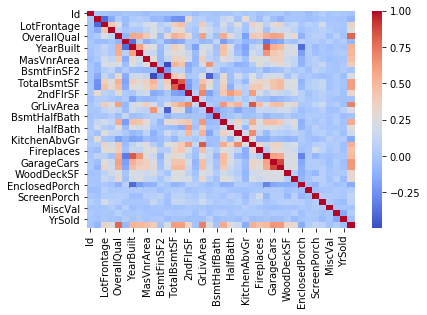

In [5]:
plt.figure()
sns.heatmap(train.corr(),cmap='coolwarm')
plt.show()

C:\Users\Vaibhav\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Vaibhav\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


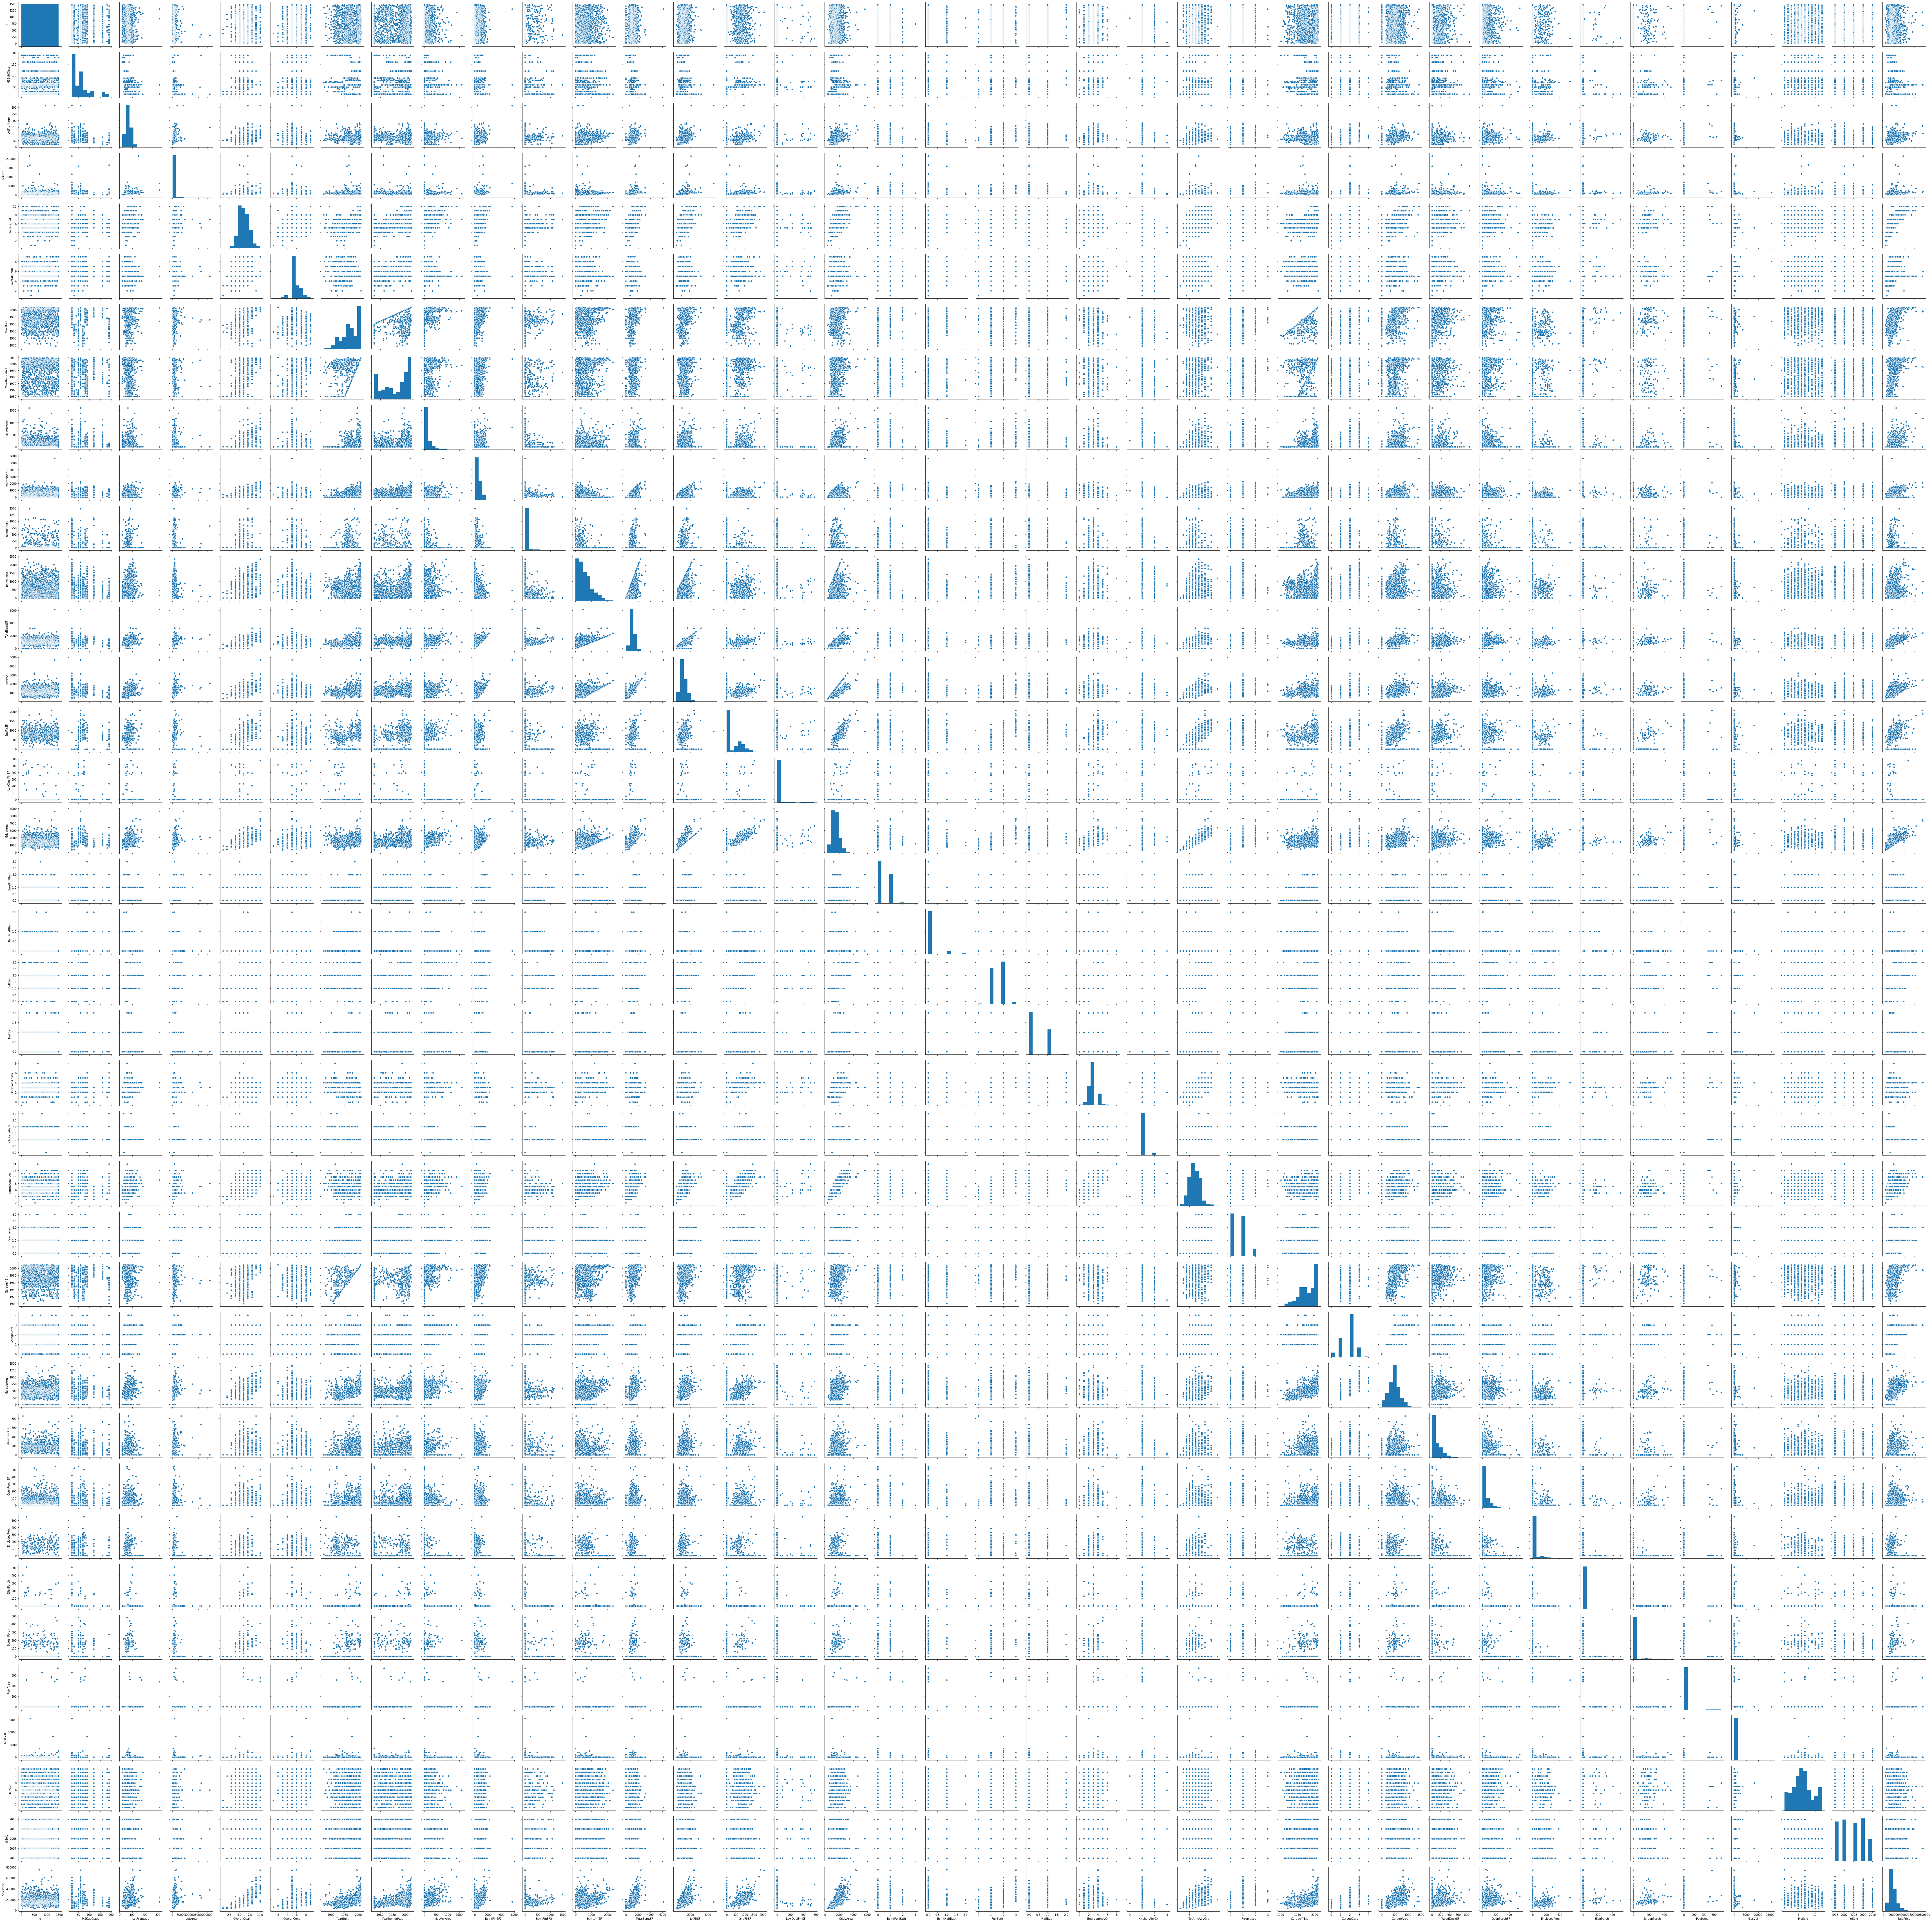

In [6]:
sns.pairplot(train, palette='rainbow')

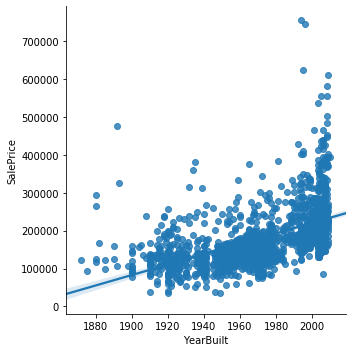

In [7]:
sns.lmplot(x='YearBuilt', y='SalePrice', data=train)


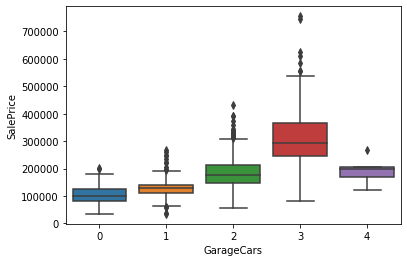

In [8]:
sns.boxplot(x='GarageCars', y='SalePrice', data=train)


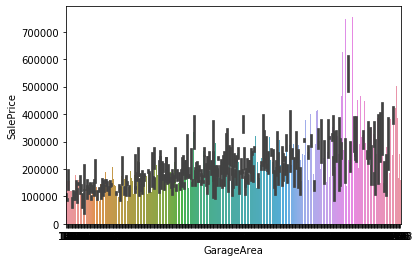

In [9]:
sns.barplot(x='GarageArea', y='SalePrice', data= train, estimator=np.mean)


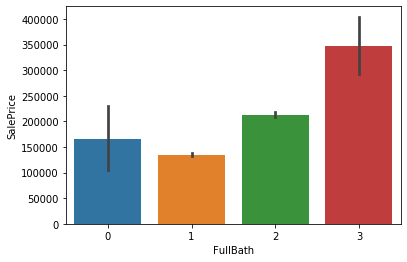

In [10]:
sns.barplot(x='FullBath',y = 'SalePrice',data=train)


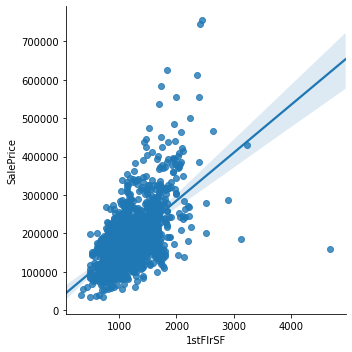

In [11]:
sns.lmplot(x='1stFlrSF',y='SalePrice',data=train)


## Feature Engineering

In [12]:
data = data[['LotArea','Street', 'Neighborhood','Condition1', 'Condition2','BldgType','HouseStyle','OverallCond', 'Heating','CentralAir','Electrical','1stFlrSF','2ndFlrSF','BsmtHalfBath','FullBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','GarageCars','GarageArea','PoolArea']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 21 columns):
LotArea         2919 non-null int64
Street          2919 non-null object
Neighborhood    2919 non-null object
Condition1      2919 non-null object
Condition2      2919 non-null object
BldgType        2919 non-null object
HouseStyle      2919 non-null object
OverallCond     2919 non-null int64
Heating         2919 non-null object
CentralAir      2919 non-null object
Electrical      2918 non-null object
1stFlrSF        2919 non-null int64
2ndFlrSF        2919 non-null int64
BsmtHalfBath    2917 non-null float64
FullBath        2919 non-null int64
BedroomAbvGr    2919 non-null int64
KitchenAbvGr    2919 non-null int64
TotRmsAbvGrd    2919 non-null int64
GarageCars      2918 non-null float64
GarageArea      2918 non-null float64
PoolArea        2919 non-null int64
dtypes: float64(3), int64(9), object(9)
memory usage: 479.0+ KB


In [13]:
data['BsmtHalfBath'] = data['BsmtHalfBath'].fillna(data['BsmtHalfBath'].mean())
data['Electrical'] = data['Electrical'].fillna('SBrkr')
data['GarageCars'] = data['GarageCars'].fillna(data['GarageCars'].mean())
data['GarageArea'] = data['GarageArea'].fillna(data['GarageArea'].mean())


### Encoding categorical features

In [14]:
categorical_feature_mask = data.dtypes==object
categorical_cols = data.columns[categorical_feature_mask].tolist()


In [15]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data[categorical_cols] = data[categorical_cols].apply(lambda col: labelencoder.fit_transform(col))

data.shape

(2919, 21)

In [16]:
train = data[:n_train]
test = data[n_train:]

# Linear Regression

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.2, random_state = 0)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)


In [20]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)


In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
print(regressor.intercept_)


[-1.48972169e-17]


In [23]:
print(regressor.coef_)


[[ 0.06183852  0.03983728  0.04010449 -0.01024082 -0.05357477 -0.01306587
   0.02762094  0.03256504 -0.02433885  0.03671471  0.01829571  0.50473109
   0.34870288  0.00693445  0.13233126 -0.19634862 -0.17350424  0.12328603
   0.13653508  0.10309524  0.0069788 ]]


In [24]:
predictions = regressor.predict(X_test)
predictions = predictions.reshape(-1,1)


### Checking errors 

In [25]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test,predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))


MAE: 0.36689758214027474
MSE: 0.39554412095452435
RMSE: 0.6289229849151041


Text(0.5, 1.0, 'Linear Regression Model')

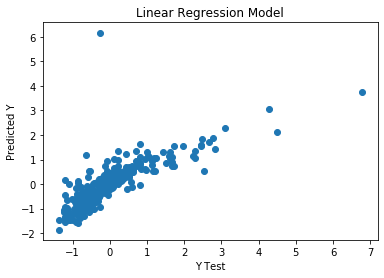

In [26]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Linear Regression Model')


# Gradient Boosting Regression

In [27]:
from sklearn import ensemble

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split':2, 'learning_rate':0.01, 'loss': 'ls'}

clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(X_train, y_train)


C:\Users\Vaibhav\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [28]:
clf_pred = clf.predict(X_test)
clf_pred = clf_pred.reshape(-1,1)


### Checking errors 

In [29]:
print('MAE:', metrics.mean_absolute_error(y_test,clf_pred))
print('MSE:', metrics.mean_squared_error(y_test,clf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,clf_pred)))


MAE: 0.2681774104364318
MSE: 0.1645120918911647
RMSE: 0.4056009022316946


Text(0.5, 1.0, 'Gradient Boosting Regression Model')

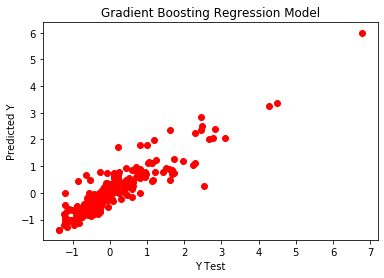

In [30]:
plt.scatter(y_test, clf_pred, c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Gradient Boosting Regression Model')


# Decision Tree Regression

In [31]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

dtr_pred = dt_reg.predict(X_test)
dtr_pred = dtr_pred.reshape(-1,1)


### Checking errors 

In [32]:
print('MAE:', metrics.mean_absolute_error(y_test,dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test,dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,dtr_pred)))


MAE: 0.3822667713122927
MSE: 0.3539945356022647
RMSE: 0.5949743991150078


Text(0.5, 1.0, 'Decision Tree Regression Model')

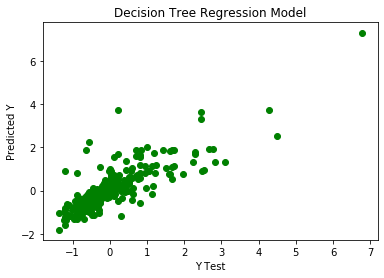

In [33]:
plt.scatter(y_test, dtr_pred, c = 'green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Decision Tree Regression Model')


# Support Vector Machine Regression

In [34]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

svr_pred = svr.predict(X_test)
svr_pred = svr_pred.reshape(-1,1)


C:\Users\Vaibhav\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Checking errors 

In [35]:
print('MAE:', metrics.mean_absolute_error(y_test,svr_pred))
print('MSE:', metrics.mean_squared_error(y_test,svr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,svr_pred)))


MAE: 0.3050757653353235
MSE: 0.38146703421140526
RMSE: 0.6176301759235905


Text(0.5, 1.0, 'SVR Model')

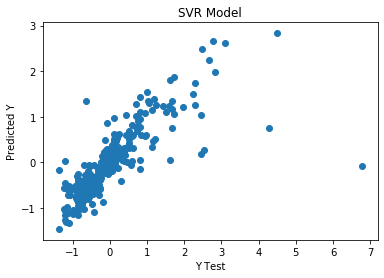

In [36]:
plt.scatter(y_test, svr_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('SVR Model')


# Random Forest Regression

In [37]:
rfr = ensemble.RandomForestRegressor(n_estimators = 500, random_state = 0)
rfr.fit(X_train, y_train)

rfr_pred = rfr.predict(X_test)
rfr_pred = rfr_pred.reshape(-1,1)


C:\Users\Vaibhav\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


### Checking errors 

In [38]:
print('MAE:', metrics.mean_absolute_error(y_test,rfr_pred))
print('MSE:', metrics.mean_squared_error(y_test,rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,rfr_pred)))


MAE: 0.2791202381487441
MSE: 0.19756795738276312
RMSE: 0.44448617231896326


Text(0.5, 1.0, 'Random Forest Regression Model')

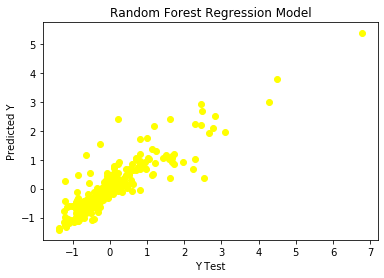

In [39]:
plt.scatter(y_test, rfr_pred, c = 'yellow')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Random Forest Regression Model')
 

In [41]:
error_rate = np.array([metrics.mean_squared_error(y_test,predictions),
                       metrics.mean_squared_error(y_test,clf_pred),
                       metrics.mean_squared_error(y_test,dtr_pred),
                       metrics.mean_squared_error(y_test,svr_pred),
                       metrics.mean_squared_error(y_test,rfr_pred)])
error_rate

array([0.39554412, 0.16451209, 0.35399454, 0.38146703, 0.19756796])

### Plotting error rate of all the Regression Models

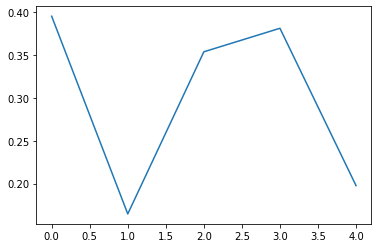

In [42]:
plt.plot(error_rate)


In [43]:
test = sc_X.fit_transform(test)
test.shape


(1459, 21)

In [45]:
test_prediction_clf = clf.predict(test)
test_prediction_clf = test_prediction_clf.reshape(-1,1)
test_prediction_clf

array([[-0.67573347],
       [-0.27865733],
       [ 0.03517104],
       ...,
       [-0.25181588],
       [-0.80512675],
       [ 0.68724557]])

In [46]:
test_prediction_clf =sc_y.inverse_transform(test_prediction_clf)

In [47]:
test_pred_clf = pd.DataFrame(test_prediction_clf, columns=['SalePrice'])

In [48]:
test_new = pd.read_csv('test.csv')

In [49]:
df= pd.concat([test_new,test_pred_clf], axis=1, join='inner')

In [50]:
df= df[['Id','SalePrice']]

In [51]:
df.to_csv('prediction.csv' , index=False)

In [52]:
df.head()

Id      SalePrice
0  1461  125215.956913
1  1462  158213.556879
2  1463  184293.147435
3  1464  170948.331948
4  1465  198882.454105